<a href="https://colab.research.google.com/github/selfor21/COM420/blob/main/COM520_Desafio02_Modelo03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COM520 - Aprendizado Profundo

## Exercício de Apoio - Semana 02

### Redes Convolucionais

- Carregamento dos pacotes necessários
- Carregamento dos dados (MNIST)
- Desenvolvimento de um modelo MLP
- Desenvolvimento de um modelo CNN
- Transferência de aprendizagem (transfer learning): Cat vs. Dog

Observações: 
- ativar a GPU (Menu [Runtime], opção [Change runtime type])
- Sem GPU, a execução deste caderno pode levar mais de 40 minutos.


# 1- Pacotes

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import keras.datasets as kds

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

print(tf.__version__)

2.12.0


### 1.1 - Criação de Listas para armazenar resultados

In [7]:
test_loss_l = []
test_acc_l = []
activation_l = []
history_l = []

# 2- Carregamento dos Dados

## 2.1- Dados

In [8]:
num_classes = 10
input_shape = (28, 28, 1)

# Carga dos dados (keras.datasets)
(x_train, y_train), (x_test, y_test) = kds.mnist.load_data()

# Normalização das features
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Conversão das classes em vetores one-hot-encoding 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


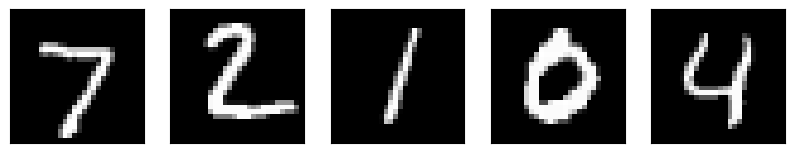

In [9]:
plt.figure(figsize=(10, 8))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 3- Modelo 3 - CNN

## 3.1 - Configuração dos Modelos.
Podemos testar a variação na quantidade de filtros (kernel´s), o tamanho dos filtros e o tamanho do Pool-size.

In [10]:
modelo1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(5, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

modelo1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 5)         50        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 5)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 10)        460       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [11]:
modelo2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

modelo2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [12]:
modelo3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(5, kernel_size=(2, 2), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(10, kernel_size=(2, 2), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

modelo1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 5)         50        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 5)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 10)        460       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

## 3.2- Grafo ilustrativo da rede gerada

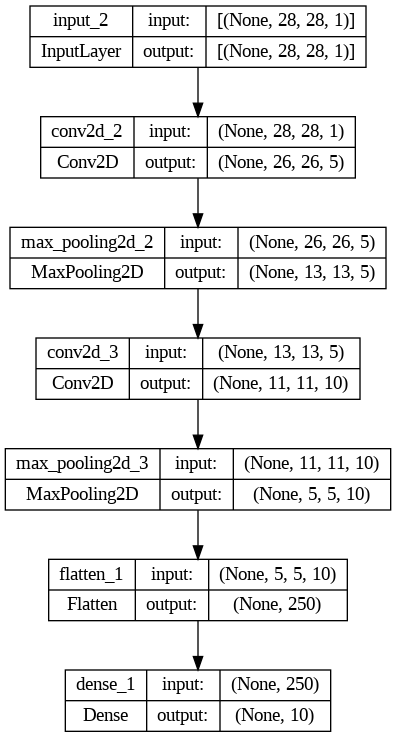

In [14]:
tf.keras.utils.plot_model(modelo1, show_shapes=True)

## 3.3- Testando os modelos

In [15]:
modelo1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history1 = modelo1.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 15s - loss: 1.1072 - accuracy: 0.6968 - val_loss: 0.3539 - val_accuracy: 0.8982 - 15s/epoch - 82ms/step
Epoch 2/30
188/188 - 21s - loss: 0.3080 - accuracy: 0.9103 - val_loss: 0.2262 - val_accuracy: 0.9352 - 21s/epoch - 110ms/step
Epoch 3/30
188/188 - 14s - loss: 0.2138 - accuracy: 0.9374 - val_loss: 0.1671 - val_accuracy: 0.9520 - 14s/epoch - 76ms/step
Epoch 4/30
188/188 - 14s - loss: 0.1667 - accuracy: 0.9511 - val_loss: 0.1358 - val_accuracy: 0.9611 - 14s/epoch - 73ms/step
Epoch 5/30
188/188 - 14s - loss: 0.1370 - accuracy: 0.9584 - val_loss: 0.1183 - val_accuracy: 0.9666 - 14s/epoch - 73ms/step
Epoch 6/30
188/188 - 14s - loss: 0.1182 - accuracy: 0.9655 - val_loss: 0.1048 - val_accuracy: 0.9694 - 14s/epoch - 73ms/step
Epoch 7/30
188/188 - 14s - loss: 0.1062 - accuracy: 0.9683 - val_loss: 0.1031 - val_accuracy: 0.9696 - 14s/epoch - 75ms/step
Epoch 8/30
188/188 - 14s - loss: 0.0968 - accuracy: 0.9708 - val_loss: 0.0897 - val_accuracy: 0.9733 - 14s/epoch - 73ms/step

In [16]:
modelo2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history2 = modelo2.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 17s - loss: 0.9222 - accuracy: 0.7374 - val_loss: 0.2984 - val_accuracy: 0.9160 - 17s/epoch - 92ms/step
Epoch 2/30
188/188 - 16s - loss: 0.2634 - accuracy: 0.9227 - val_loss: 0.2077 - val_accuracy: 0.9393 - 16s/epoch - 83ms/step
Epoch 3/30
188/188 - 16s - loss: 0.1961 - accuracy: 0.9414 - val_loss: 0.1665 - val_accuracy: 0.9520 - 16s/epoch - 83ms/step
Epoch 4/30
188/188 - 17s - loss: 0.1608 - accuracy: 0.9520 - val_loss: 0.1483 - val_accuracy: 0.9563 - 17s/epoch - 89ms/step
Epoch 5/30
188/188 - 15s - loss: 0.1412 - accuracy: 0.9577 - val_loss: 0.1314 - val_accuracy: 0.9600 - 15s/epoch - 82ms/step
Epoch 6/30
188/188 - 16s - loss: 0.1266 - accuracy: 0.9616 - val_loss: 0.1201 - val_accuracy: 0.9638 - 16s/epoch - 83ms/step
Epoch 7/30
188/188 - 16s - loss: 0.1160 - accuracy: 0.9646 - val_loss: 0.1145 - val_accuracy: 0.9656 - 16s/epoch - 83ms/step
Epoch 8/30
188/188 - 17s - loss: 0.1069 - accuracy: 0.9680 - val_loss: 0.1090 - val_accuracy: 0.9669 - 17s/epoch - 92ms/step


In [17]:
modelo3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history3 = modelo3.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 13s - loss: 1.1351 - accuracy: 0.6888 - val_loss: 0.4377 - val_accuracy: 0.8743 - 13s/epoch - 69ms/step
Epoch 2/30
188/188 - 12s - loss: 0.3854 - accuracy: 0.8853 - val_loss: 0.2922 - val_accuracy: 0.9176 - 12s/epoch - 64ms/step
Epoch 3/30
188/188 - 12s - loss: 0.2762 - accuracy: 0.9179 - val_loss: 0.2304 - val_accuracy: 0.9353 - 12s/epoch - 65ms/step
Epoch 4/30
188/188 - 12s - loss: 0.2194 - accuracy: 0.9351 - val_loss: 0.1903 - val_accuracy: 0.9457 - 12s/epoch - 64ms/step
Epoch 5/30
188/188 - 12s - loss: 0.1835 - accuracy: 0.9450 - val_loss: 0.1665 - val_accuracy: 0.9524 - 12s/epoch - 64ms/step
Epoch 6/30
188/188 - 12s - loss: 0.1591 - accuracy: 0.9520 - val_loss: 0.1499 - val_accuracy: 0.9560 - 12s/epoch - 64ms/step
Epoch 7/30
188/188 - 12s - loss: 0.1438 - accuracy: 0.9568 - val_loss: 0.1401 - val_accuracy: 0.9602 - 12s/epoch - 63ms/step
Epoch 8/30
188/188 - 13s - loss: 0.1324 - accuracy: 0.9595 - val_loss: 0.1281 - val_accuracy: 0.9639 - 13s/epoch - 67ms/step


##3.4- Gráfico comparativo evolução nas épocas

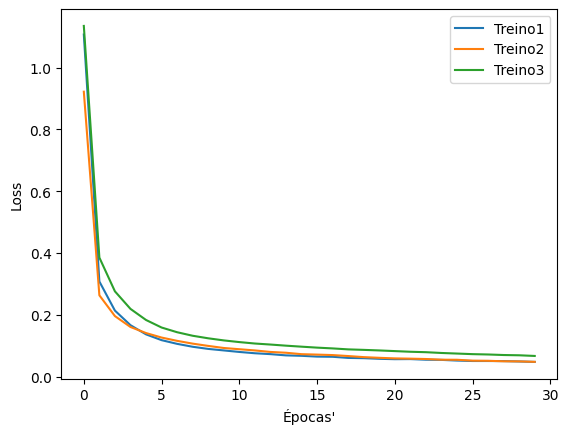

In [19]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history1.history['loss'], label="Treino1")
#plt.plot(history1.history['val_loss'], label="Val1")
plt.plot(history2.history['loss'], label="Treino2")
#plt.plot(history2.history['val_loss'], label="Val2")
plt.plot(history3.history['loss'], label="Treino3")
#plt.plot(history3.history['val_loss'], label="Val3")


plt.legend()
plt.show()


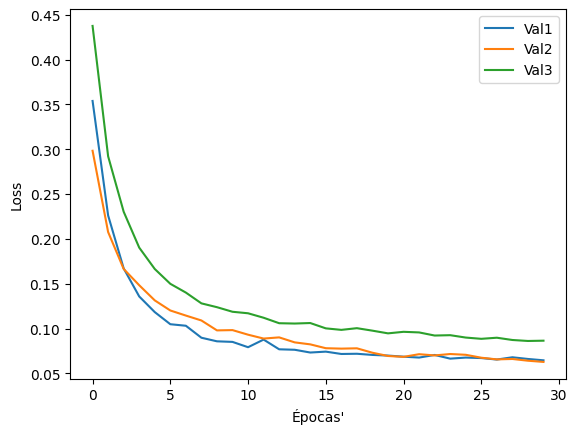

In [20]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
#plt.plot(history1.history['loss'], label="Treino1")
plt.plot(history1.history['val_loss'], label="Val1")
#plt.plot(history2.history['loss'], label="Treino2")
plt.plot(history2.history['val_loss'], label="Val2")
#plt.plot(history3.history['loss'], label="Treino3")
plt.plot(history3.history['val_loss'], label="Val3")


plt.legend()
plt.show()

## 3.5- Conjunto de Teste - Acurácia

In [21]:
# Avaliação do modelo treinado no conjunto de tete
print("Avaliação do modelo (Teste)")
results1 = modelo1.evaluate(x_test, y_test, batch_size=1000)
test_loss_l.append(results1[0])
test_acc_l.append(results1[1])
print("Modelo 01- Test loss, Test acc:", results1)
results2 = modelo2.evaluate(x_test, y_test, batch_size=1000)
test_loss_l.append(results2[0])
test_acc_l.append(results2[1])

print("Modelo 02- Test loss, Test acc:", results1)
results3 = modelo3.evaluate(x_test, y_test, batch_size=1000)
test_loss_l.append(results3[0])
test_acc_l.append(results3[1])

print("Modelo 03- Test loss, Test acc:", results1)


Avaliação do modelo (Teste)
10/10 [==============================] - 1s 97ms/step - loss: 0.0520 - accuracy: 0.9815
Modelo 01- Test loss, Test acc: [0.052045099437236786, 0.9815000295639038]
10/10 [==============================] - 1s 97ms/step - loss: 0.0545 - accuracy: 0.9833
Modelo 02- Test loss, Test acc: [0.052045099437236786, 0.9815000295639038]
10/10 [==============================] - 2s 164ms/step - loss: 0.0718 - accuracy: 0.9768
Modelo 03- Test loss, Test acc: [0.052045099437236786, 0.9815000295639038]
